<a href="https://colab.research.google.com/github/rma1399/ml-ai-data-science_Learning/blob/main/ConvoNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


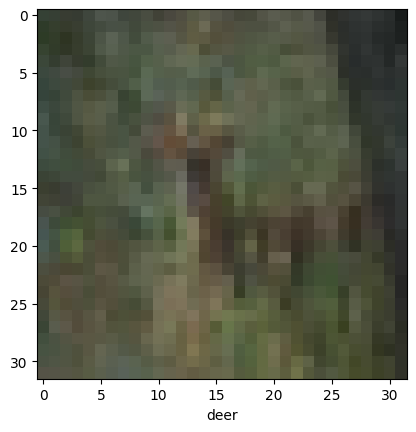

In [3]:
IMG_INDEX = 10
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [7]:


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(train_images, train_labels, epochs=10,
          validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.5869 - accuracy: 0.4114 - val_loss: 1.2597 - val_accuracy: 0.5435
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.2041 - accuracy: 0.5675 - val_loss: 1.1324 - val_accuracy: 0.5929
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0487 - accuracy: 0.6273 - val_loss: 1.0329 - val_accuracy: 0.6334
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9438 - accuracy: 0.6661 - val_loss: 0.9534 - val_accuracy: 0.6612
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8712 - accuracy: 0.6923 - val_loss: 0.9312 - val_accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8128 - accuracy: 0.7144 - val_loss: 0.8910 - val_accuracy: 0.6934
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7671 - accuracy: 0.7315 - val_loss: 0.8985 -

KeyboardInterrupt: 

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 6s - loss: 0.9053 - accuracy: 0.6941 - 6s/epoch - 18ms/step

Test accuracy: 0.694100022315979
